# Loading libraries

In [4]:
import tensorflow as tf
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

sess = tf.InteractiveSession()

tf.set_random_seed(0)
np.random.seed(0)
rng = np.random.RandomState()

# Importing mnist dataset

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.reshape(x_train, [-1, 28*28])
x_test = np.reshape(x_test, [-1, 28*28])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Validation data split

In [6]:
x_train, x_val = x_train[:55000], x_train[55000:]
y_train, y_val = y_train[:55000], y_train[55000:]

# Network Parameters

In [7]:
n_input        = ...
n_hidden_1     = ...
n_hidden_2     = ...
n_hidden_3     = ...

# Training Parameters

In [8]:
learning_rate   = 0.001
training_epochs = 20
batch_size      = 100
display_step    = 1

# Xavier Initialization

In [9]:
def xavier_init(dim_in, dim_out, constant=4):
    ...

# Initializing weights & biases

In [10]:
weights = {
    'encoder_h1': ...,
    'encoder_h2': ...,
    'decoder_h1': ...,
    'decoder_h2': ...
}
biases = {
    'encoder_b1': ...,
    'encoder_b2': ...,
    'decoder_b1': ...,
    'decoder_b2': ...
}

# Creating Encoder

In [11]:
def encoder(x, activ_fnc=tf.nn.sigmoid):
    ...

# Creating Decoder

In [12]:
def decoder(x, activ_fnc=tf.nn.sigmoid):
    ...

# Initializing Model

In [13]:
x_plh = tf.placeholder("float", [None, n_input])

In [14]:
enc_model = encoder(x_plh)
dec_model = decoder(enc_model)

In [15]:
y_pred = dec_model
y_gt   = x_plh

## Defining loss-function & optimizer

In [16]:
x_error   = ...
sq_error  = ...

In [18]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(...)

# Initializing the variables

In [19]:
init = tf.global_variables_initializer()
sess.run(init)

In [20]:
def batch_indices(batch_nb, data_length, batch_size):
  # Batch start and end index
  start = int(batch_nb * batch_size)
  end = int((batch_nb + 1) * batch_size)
  # When there are not enough inputs left, we reuse some to complete the batch
  if end > data_length:
    shift = end - data_length
    start -= shift
    end -= shift
  return start, end

## Training

Epoch: 0001 , training loss= 105.5490570 , validation loss= 105.7122726
Epoch: 0002 , training loss= 83.2081604 , validation loss= 83.5761871
Epoch: 0003 , training loss= 74.4260025 , validation loss= 74.9829636
Epoch: 0004 , training loss= 69.5491257 , validation loss= 70.2583466
Epoch: 0005 , training loss= 66.1392517 , validation loss= 66.9494095
Epoch: 0006 , training loss= 63.9538994 , validation loss= 64.8469162
Epoch: 0007 , training loss= 62.2195168 , validation loss= 63.1231384
Epoch: 0008 , training loss= 60.8625984 , validation loss= 61.8106613
Epoch: 0009 , training loss= 59.9058228 , validation loss= 60.8883629
Epoch: 0010 , training loss= 59.0708504 , validation loss= 60.0503502
Epoch: 0011 , training loss= 58.2696266 , validation loss= 59.2669868
Epoch: 0012 , training loss= 57.5998306 , validation loss= 58.5955505
Epoch: 0013 , training loss= 57.1306534 , validation loss= 58.1049232
Epoch: 0014 , training loss= 56.7336464 , validation loss= 57.7275620
Epoch: 0015 , trai

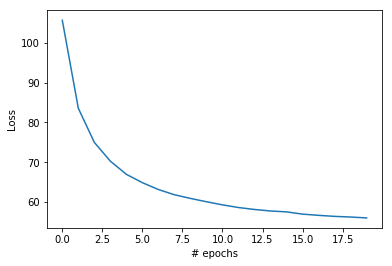

In [21]:
train_errors = []
valid_errors = []
for epoch in range(training_epochs):
    nb_batches = int(math.ceil(float(len(x_train)) / batch_size))
    assert nb_batches * batch_size >= len(x_train)

    # Indices to re-shuffle training set for every epoch
    index_shuf = list(range(len(x_train)))
    rng.shuffle(index_shuf)

    # Loop over all batches
    for batch in range(nb_batches):
        start, end = batch_indices(batch, len(x_train), batch_size)
        sess.run(optimizer, feed_dict={x_plh: x_train[index_shuf[start:end]]})
      
    train_loss = sess.run(x_error, feed_dict={x_plh: x_train})
    validation_loss = sess.run(x_error, feed_dict={x_plh: x_val})
    train_errors.append(train_loss)
    valid_errors.append(validation_loss)
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch + 1), ", training loss=", "{:.7f}".format(train_loss), ", validation loss=",
              "{:.7f}".format(validation_loss))

print("Training finished!")
plt.plot(valid_errors)
plt.xlabel("# epochs")
plt.ylabel("Loss")

In [22]:
test_loss = sess.run(x_error, feed_dict={x_plh: x_test})
print("Test loss: ", "{:.7f}".format(test_loss))

Test loss:  55.0723953


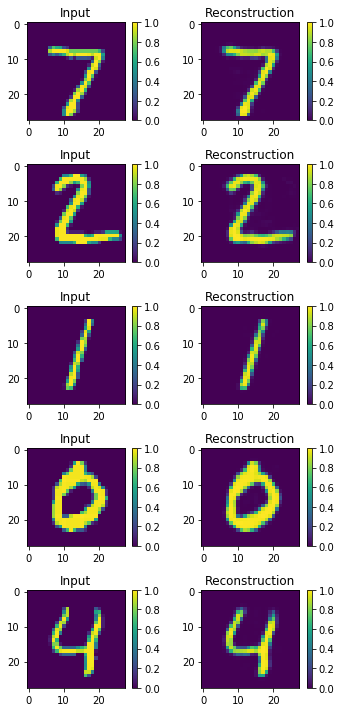

In [23]:
noSamples=5
xsample = x_test[:noSamples]
xreconst = sess.run(y_pred, feed_dict={x_plh: xsample})

fig = plt.figure(figsize=(5, noSamples*2))
for ii in range(noSamples):
    plt.subplot(noSamples, 2, 2*ii + 1)
    plt.title("Input")
    plt.imshow(np.reshape(xsample[ii], (28,28)), vmin=0, vmax=1)
    plt.colorbar()
    
    plt.subplot(noSamples, 2, 2*ii + 2)
    plt.title("Reconstruction")
    plt.imshow(np.reshape(xreconst[ii], (28,28)), vmin=0, vmax=1)
    plt.colorbar()

plt.tight_layout()
fig.savefig('out_crossError_xavierInit.png', bbox_inches='tight')